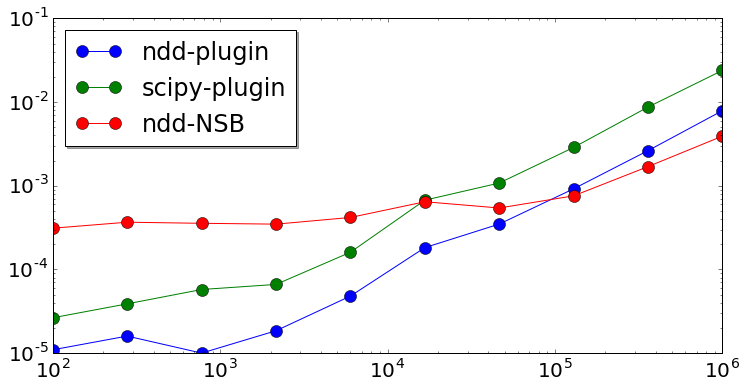

In [7]:
import ndd
import numpy as np
import scipy.stats
from matplotlib import pylab

#tell matplotlib to plot inline
%matplotlib inline

#increase the font size and markers size
from matplotlib import rc
rc('font', size=20)
rc('lines', markersize=12)

def dice_rolls(k,n):
    import numpy as np
    p = np.full(k,1.0/k)                # the probability of each face is 1/k
    counts = np.random.multinomial(n,p) # generate random counts according to p
    return counts

def timer(func,data): 
    import time
    t0 = time.time()
    s = func(data)
    return (time.time() - t0)
def ndd_plugin(data):
    return ndd.entropy(data,algorithm='plugin')

nrep = 10
names = ['ndd-plugin','scipy-plugin','ndd-NSB']
algorithms = [ndd_plugin,scipy.stats.entropy,ndd.entropy]
#names = ['ndd-NSB','ndd-plugin']
#algorithms = [ndd.entropy,ndd_plugin]
nalg = len(algorithms)

norder = 6
npoints = (norder-1)*2
X = [int(x) for x in np.logspace(2,norder,npoints)]
Y = np.zeros((npoints,nalg))
for j,t in enumerate(X):
    k = t; n = t # we will use n = k
    counts = dice_rolls(k,n)
    for rep in range(nrep):
        for i,alg in enumerate(algorithms):
            Y[j,i] += timer(alg,counts)
Y /= float(nrep)
pylab.figure(figsize=(12,6))
for i,alg in enumerate(algorithms):
    pylab.loglog(X,Y[:,i],'-o',label=names[i])    
pylab.legend(loc='upper left', shadow=True)

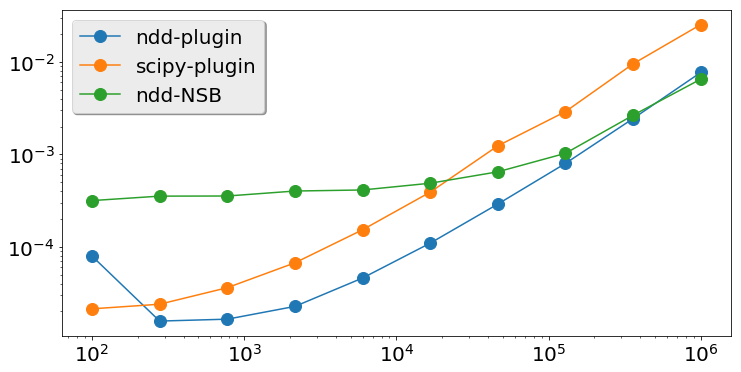

In [1]:
import ndd
import numpy as np
import scipy.stats
from matplotlib import pylab

#tell matplotlib to plot inline
%matplotlib inline

#increase the font size and markers size
from matplotlib import rc
rc('font', size=20)
rc('lines', markersize=12)

def dice_rolls(k,n):
    import numpy as np
    p = np.full(k,1.0/k)                # the probability of each face is 1/k
    counts = np.random.multinomial(n,p) # generate random counts according to p
    return counts

def timer(func,data): 
    import time
    t0 = time.time()
    s = func(data)
    return (time.time() - t0)
def ndd_plugin(data):
    return ndd.entropy(data,dist=True)

nrep = 10
names = ['ndd-plugin','scipy-plugin','ndd-NSB']
algorithms = [ndd_plugin,scipy.stats.entropy,ndd.entropy]
#names = ['ndd-NSB','ndd-plugin']
#algorithms = [ndd.entropy,ndd_plugin]
nalg = len(algorithms)

norder = 6
npoints = (norder-1)*2
X = [int(x) for x in np.logspace(2,norder,npoints)]
Y = np.zeros((npoints,nalg))
for j,t in enumerate(X):
    k = t; n = t # we will use n = k
    counts = dice_rolls(k,n)
    for rep in range(nrep):
        for i,alg in enumerate(algorithms):
            Y[j,i] += timer(alg,counts)
Y /= float(nrep)
pylab.figure(figsize=(12,6))
for i,alg in enumerate(algorithms):
    pylab.loglog(X,Y[:,i],'-o',label=names[i])    
pylab.legend(loc='upper left', shadow=True)

In [14]:
def dice_rolls(k,n):
    import numpy as np
    p = np.full(k,1.0/k)                # the probability of each face is 1/k
    counts = np.random.multinomial(n,p) # generate random counts according to p
    return counts

t_nsb = []
t_plugin = []
k = 1000000
n = 100000
counts = dice_rolls(k,n)
result = %timeit -o ndd.entropy(counts)
print('nsb', k, n, result)
result = %timeit -o ndd.entropy(counts, dist=True)
print('plugin', k, n, result)

7.98 ms ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
nsb 1000000 100000 7.98 ms ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.39 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
plugin 1000000 100000 4.39 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
